# pyCalor

In [5]:
!pip install pyCalor

Instead of using the "tables" in the back of your textbook to determine thermodynamic properties, here we will use a Python module called [`pyCalor`](https://pypi.org/project/pyCalor/).

This Python module was developed in the Department of Mechanical Engineering at the University of California, Berkeley. It is used for teaching undergraduate thermodynamics (ME40).

The software package contains classes `state` and `process`. The following is the description of their use. You can also get the built-in information by typing the following statements in the Python command line:  

`from pyCalor import thermo as th`

`print(th.state.__doc__)`   

`print(th.process.__doc__)`  

In [7]:
from pyCalor import thermo as th

In [8]:
print(th.state.__doc__)

stateObject = state(fluidName, property1=value1, property2, value2, name="A")
    
    fluidName = 'water, 'r134a', 'air', ''nitrogen', etc.
    proporty1 and property2 are two independent intensive properties
    value1 and value2 are propery values (in base units; see >>> th.state.units)
    
    Examples:
        >>> import thermo as th
        >>> th.state.units
        >>> st1 = th.state('water', p=(1,'bar'), v=0.1, name="1")
        >>> st1.plot("Pv")
        >>> st2 = th.state('R134a', x=1, t=300, name="B")
        >>> st2.plot("Ts",isoProp="v")    
        >>> st3 = th.state('air', p=(1,'Mpa'), t=(10,'c'))
        >>> st3.name = "2a"
    


In [9]:
print(th.process.__doc__)

pr = process([(state1,state2),(state2,state3),...])
    
    Examples:
        >>> import thermo as th
        >>> st1 = th.state('water', p=( 1,'bar'), x=0, name="A")
        >>> st2 = th.state('water', p=(20,'bar'), s=st1.s, name="B")
        >>> pr = process([st1,st2])
        >>> pr.plot("pv")
        >>> st3 = th.state('water', p=(20,'bar'), x=1,name="C")
        >>> st4 = th.state('water', p=( 1,'bar'), s=st3.s, name="D")
        >>> pr2 = th.process([(st1,st2),(st2,st3),(st3,st4),(st4,st1)])
        >>> pr2.plot("Ts")
    


## Class **state**  

A call

`from pyCalor import thermo as th`

`st = th.state(substance, property1=value1, property2=value2, name="A")`  

creates an object of class `state`. Each such object contains the following fields:  


| - | name | description |
| :-----------: | :--------------: | :-------------------------: |
| `st.p` | pressure | (in units of kPa)  |
| `st.t` | temperature | (in units of K)  |
| `st.v` | specific volume | (in units of m3/kg)  |
| `st.u` | specific energy | (in units of kJ/kg)  |
| `st.h` | specific enthalpy | (in units of kJ/kg)  |
| `st.s` | specific entropy | (in units of kJ/kg K)  |
| `st.x` | quality | (fraction)  |
| `st.molW` | molecular weight | (in units of kg/kmol)  |
| `st.R` | gas constant | (in units of kJ/kg K)  |
| `st.substance` | 'water', 'air', 'nitrogen', ... | ()  |

The property values are in the “base units”; they can be viewed by issuing a command:

`state.units`

Examples:

In [17]:
from pyCalor import thermo as th
import matplotlib.pyplot as plt

In [18]:
th.state.units

{'T': 'K',
 'P': 'kPa',
 'v': 'm3/kg',
 'u': 'kJ/kg',
 'h': 'kJ/kg',
 's': 'kJ/kg K',
 'x': 'fraction'}

In [47]:
st1 = th.state('water', p=(1,'bar'), v=0.1, name="1")
# st1.substance
print(dir(st1))
st1.fluidName
st1.fluidSet

['P', 'R', 'T', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'cp', 'cv', 'fluidName', 'fluidSet', 'h', 'molW', 'name', 'p', 'phase', 'phases', 'plot', 'propList', 'prop_array', 's', 't', 'u', 'units', 'v', 'x']


{'water': <CoolProp.CoolProp.AbstractState at 0x7c8d2c307eb0>,
 'R134a': <CoolProp.CoolProp.AbstractState at 0x7c8cbdebd9f0>,
 'air': <CoolProp.CoolProp.AbstractState at 0x7c8cbdebe7b0>}

In [33]:
st1.plot("pv") # supported plots are: "pv","Ts","ph"

AttributeError: 'state' object has no attribute 'fluid'

In [29]:
st2 = th.state('R134a', x=1, t=300, name="B")
st2.plot("Ts", isoProp="v")

AttributeError: 'state' object has no attribute 'fluid'

In [21]:
st3 = th.state('air', p=(1,'Mpa'), t=(10,'c'))
st3.name = "2a"

This information can also be viewed in the programming environment; 

`th.state.__doc__`

In [22]:
th.state.__doc__

'stateObject = state(fluidName, property1=value1, property2, value2, name="A")\n    \n    fluidName = \'water, \'r134a\', \'air\', \'\'nitrogen\', etc.\n    proporty1 and property2 are two independent intensive properties\n    value1 and value2 are propery values (in base units; see >>> th.state.units)\n    \n    Examples:\n        >>> import thermo as th\n        >>> th.state.units\n        >>> st1 = th.state(\'water\', p=(1,\'bar\'), v=0.1, name="1")\n        >>> st1.plot("Pv")\n        >>> st2 = th.state(\'R134a\', x=1, t=300, name="B")\n        >>> st2.plot("Ts",isoProp="v")    \n        >>> st3 = th.state(\'air\', p=(1,\'Mpa\'), t=(10,\'c\'))\n        >>> st3.name = "2a"\n    '

## Class process

A call

`from pyCalor import thermo as th`

`pr = th.process([(state1,state2),(state2,state3),...])`

creates an object of class process. An object of this class represent a simple process, from `st1` to `st2`,

`pr = th.process(st1,st2)`

a simple cyclic process,

`pr = th.process([(st1,st2),(st2,st3),(st3,st4),(st4,st1)])`,

which can also be created as 

`pr = th.process(st1,st2,st3,st4,st1)`,

or any complex process, but for a single working fluid.  

You can access process object properties by the following calls

|  |  description |
| :----------- | :--------------: |
| `pr.StateList` | returns a list of `state` objects| 
| `pr.isoProp(st1,st2)` | returns a dictionary of `{isoProperty: value,...}` for process `st1` &rarr; `st2` |

Once you created process object `pr`, you can display its states on a thermodynamic diagram via  

`pr.plot('ts')`   

to display process `pr` on a *T-s* diagram; you may likewise to make such plot in other coordinates, like `'pv'`, `'ph'`, etc.  






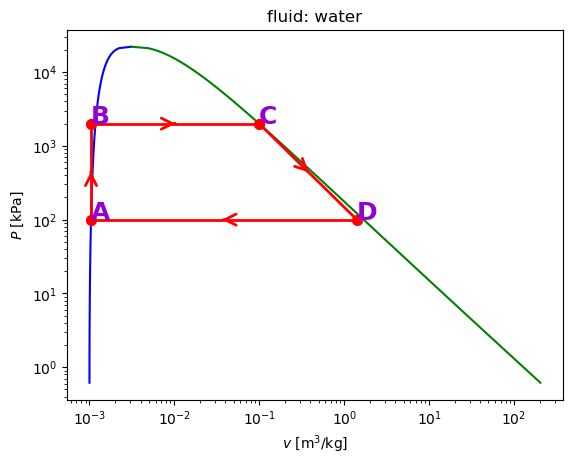

In [23]:
st1 = th.state('water', p=( 1,'bar'), x=0, name="A")
st2 = th.state('water', p=(20,'bar'), s=st1.s,name="B")
st3 = th.state('water', p=(20,'bar'), x=1,name="C")
st4 = th.state('water', p=( 1,'bar'), s=st3.s, name="D")
pr = th.process([(st1,st2),(st2,st3),(st3,st4),(st4,st1)])
pr.plot("pv")

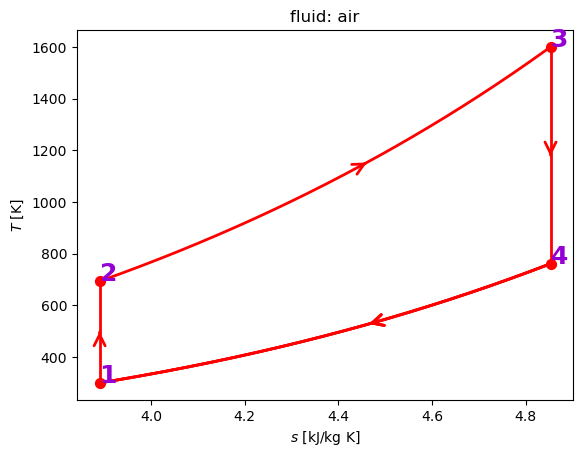

In [24]:
plt.figure
sub = 'air'
st5 = th.state(sub, p=(1,'bar'), t=300, name="1")
st6 = th.state(sub, p=(2,'Mpa'), s=st5.s, name="2")
st7 = th.state(sub, p=(2,'Mpa'), t=1600, name="3")
st8 = th.state(sub, p=(1,'bar'), s=st7.s)
st8.name = "4"
pr = th.process([st5, st6, st7, st8, st5])
pr.plot("ts")